In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [2]:
train_dataF = pd.read_csv('Final_Train.csv')
test_dataF = pd.read_csv('Final_Test.csv')

In [3]:
test_dataF.to_csv('pred_file.csv', index=False)

In [4]:
train_dataF.head()

,Gender,Age,Education_Level,Relationship_Status,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,...,Quality,R&D,Sales,Analytical,Behavioral,Conceptual,type0,type1,type2,type3
0,0,42,4,0,4.0,4,33,1,1,7,...,0,0,0,0,0,1,0,0,1,0
1,1,24,3,1,5.0,4,36,0,3,6,...,0,0,0,1,0,0,0,0,1,0
2,0,58,3,0,27.0,3,51,0,2,8,...,1,0,0,0,0,1,0,0,1,0
3,0,26,3,1,4.0,3,56,1,3,8,...,0,0,0,0,1,0,0,0,1,0
4,0,31,1,0,5.0,4,62,1,3,2,...,0,0,0,0,0,1,0,0,0,1


In [5]:
train_dataF.isnull().values.sum()

0

In [6]:
X_train = train_dataF.drop('Attrition_rate',axis=1)
y_train = train_dataF[['Attrition_rate']]

In [7]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 1 columns):
Attrition_rate    7000 non-null float64
dtypes: float64(1)
memory usage: 54.8 KB


In [8]:
len(test_dataF)

3000

In [9]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [10]:
train_dataF.describe()

,Gender,Age,Education_Level,Relationship_Status,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,...,Quality,R&D,Sales,Analytical,Behavioral,Conceptual,type0,type1,type2,type3
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,...,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,0.412286,39.586143,3.187857,0.354286,13.385064,2.367143,47.064286,0.817857,2.798000,6.006286,...,0.027571,0.097143,0.134714,0.250714,0.248000,0.250857,0.026714,0.019000,0.563571,0.340286
std,0.492281,13.201171,1.065102,0.478330,10.257016,1.149395,15.761406,0.648205,1.163721,2.057112,...,0.163753,0.296173,0.341443,0.433455,0.431883,0.433537,0.161259,0.136534,0.495978,0.473839
min,0.000000,19.000000,1.000000,0.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,3.000000,0.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,39.000000,3.000000,0.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,51.000000,4.000000,1.000000,20.000000,3.000000,61.000000,1.000000,3.000000,8.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,65.000000,5.000000,1.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
model_ran = RandomForestRegressor(n_jobs = -1)
model_ran.fit(X_train,y_train)
model_ran.score(X_train,y_train)

C:\Users\Anurag Pareta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Anurag Pareta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.7940896562769908

In [12]:
# def rmse(x,y): return math.sqrt(((x-y)**2).mean())

# def print_score(model):
#     res = [rmse(model.predict(X_test), y_test),model.score(X_test, y_test)]
#     if hasattr(model, 'oob_score_'): res.append(model.oob_score_)
#     print(res)

In [13]:
y_train.shape

(7000, 1)

In [14]:
from sklearn import tree
#draw_tree(m.estimators_[0], X_train1, precision=3)

In [15]:
# m = RandomForestRegressor(n_jobs=-1, oob_score=True)
# %time m.fit(X_train, y_train)
# print_score(m)

# feature Importance

In [16]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model_xtr = ExtraTreesRegressor()
model_xtr.fit(X_train,y_train)

C:\Users\Anurag Pareta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Anurag Pareta\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [17]:
print(model_xtr.feature_importances_)

[0.00081477 0.05589423 0.05358145 0.03263177 0.05726006 0.05418226
 0.06231084 0.03337302 0.04523295 0.05667873 0.05447782 0.05391588
 0.05127692 0.05398184 0.05057684 0.01344633 0.0131116  0.01834317
 0.02132061 0.00894007 0.02286709 0.01121691 0.01686789 0.00810894
 0.01856061 0.02060588 0.0191791  0.01059386 0.02595633 0.00587181
 0.00731242 0.02196176 0.01954625]


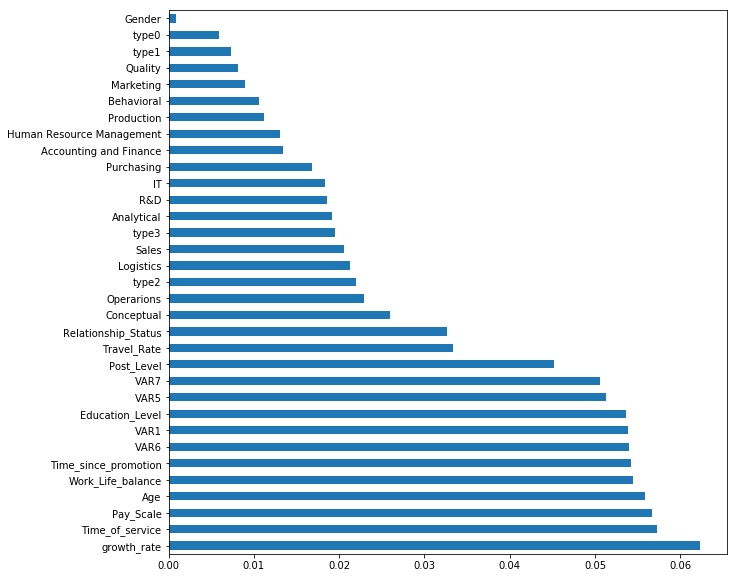

In [18]:
feat_importances = pd.Series(model_xtr.feature_importances_, index=X_train.columns)
plt.figure(figsize=(10,10))
feat_importances.nlargest(len(X_train.columns)).plot(kind='barh')
plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 

In [20]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [21]:
# grid_search.fit(X_train,y_train)
# grid_search.best_params_

In [26]:
model_ran2 = RandomForestRegressor(n_estimators=200, min_samples_leaf=5, max_features=2, n_jobs=1, max_depth=110,min_samples_split=8,bootstrap=False)#,oob_score=True)
model_ran2.fit(X_train, y_train)
#print_score(model_ran2)

C:\Users\Anurag Pareta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=110,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [ ]:
# m2 = RandomForestRegressor(n_estimators=1000, min_samples_leaf=5, max_features=2, n_jobs=-1, max_depth=50,min_samples_split=4,bootstrap=True,oob_score=True)
# m2.fit(X_train1, y_train1)
# print_score(m2)

In [27]:
predictions = model_ran2.predict(test_dataF)

In [28]:
predictions.shape

(3000,)

In [29]:
data1 = pd.read_csv('pred_file.csv')

In [30]:
data1.shape

(3000, 1)

In [31]:
data1['Attrition_rate'] = predictions

In [32]:
data1.to_csv('pred_file.csv',index=False)

In [33]:
data1.shape

(3000, 2)

In [ ]:
y_train.shape

In [ ]:
# def evaluate(model, test_features, test_labels):
#     predictions = model.predict(test_features)
#     errors = abs(predictions - test_labels)
#     mape = 100 * np.mean(errors / test_labels)
#     accuracy = 100 - mape
#     print('Model Performance')
#     print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
#     print('Accuracy = {:0.2f}%.'.format(accuracy))
    
#     return accuracy

In [ ]:
# base_accuracy = evaluate(m, X_test, y_test)

# XG Boost

In [ ]:
!pip install xgboost
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [ ]:
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [ ]:
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [ ]:
xgb_grid.fit(X_train1,y_train1)

In [ ]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

In [ ]:
xgb2 = XGBRegressor(colsample_bytree= 0.7, learning_rate=0.03, max_depth= 5, min_child_weight= 4, n_estimators=500, nthread= 4, objective= 'reg:linear', silent= 1, subsample= 0.7)

In [ ]:
xgb2.fit(X_train1, y_train1)
#print_score(m)

In [ ]:
predictions2 = xgb2.predict(test_dataF)

In [ ]:

predictions2.shape

In [ ]:
data5 = pd.read_csv('pred_file2.csv')

In [ ]:
data5.shape

In [ ]:
data5['Attrition_rate'] = predictions2

In [ ]:
data5.to_csv('pred_file2.csv',index=False)

In [ ]:
#-----------------------------------------------

In [ ]:
print(y_test[0:20])

In [ ]:
from xgboost import XGBRegressor
reg = XGBRegressor()

In [ ]:
n_estimators = [100,500,900,1100,1500]
max_depth = [2,3,5,10,15]
booster = ['gbtree','gblinear']
learning_rate = [0.05,0.1,0.15,0.20]
min_child_weight = [1,2,3,4]
base_score=[0.25,0.5,0.75,1]

In [ ]:
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(reg,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv.fit(X_train,y_train)

In [ ]:
random_cv.best_estimator_

In [ ]:
random_cv.best_score_